# Data Preparation and Cleaning

In [ ]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/Summer-Olympic-medals-1976-to-2008.csv', encoding='latin1')

In [ ]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
df.columns

Index(['City', 'Year', 'Sport', 'Discipline', 'Event', 'Athlete', 'Gender',
       'Country_Code', 'Country', 'Event_gender', 'Medal'],
      dtype='object')

In [ ]:
df.dtypes

,0
City,object
Year,float64
Sport,object
Discipline,object
Event,object
Athlete,object
Gender,object
Country_Code,object
Country,object
Event_gender,object


In [ ]:
#checking null values
df.isnull().sum()

,0
City,117
Year,117
Sport,117
Discipline,117
Event,117
Athlete,117
Gender,117
Country_Code,117
Country,117
Event_gender,117


In [ ]:
df.shape

(15433, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15433 entries, 0 to 15432
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   City          15316 non-null  object 
 1   Year          15316 non-null  float64
 2   Sport         15316 non-null  object 
 3   Discipline    15316 non-null  object 
 4   Event         15316 non-null  object 
 5   Athlete       15316 non-null  object 
 6   Gender        15316 non-null  object 
 7   Country_Code  15316 non-null  object 
 8   Country       15316 non-null  object 
 9   Event_gender  15316 non-null  object 
 10  Medal         15316 non-null  object 
dtypes: float64(1), object(10)
memory usage: 1.3+ MB


In [ ]:
df.describe()

,Year
count,15316.000000
mean,1993.620789
std,10.159851
min,1976.000000
25%,1984.000000
50%,1996.000000
75%,2004.000000
max,2008.000000


In [ ]:
#dropping null values
df.dropna(inplace=True)

In [ ]:
df.shape

(15316, 11)

In [ ]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country_Code,Country,Event_gender,Medal
0,Montreal,1976.0,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,GDR,East Germany,W,Silver
1,Montreal,1976.0,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,URS,Soviet Union,M,Bronze
2,Montreal,1976.0,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,USA,United States,M,Gold
3,Montreal,1976.0,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,ITA,Italy,M,Silver
4,Montreal,1976.0,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,USA,United States,W,Bronze


In [ ]:
#We don't need Event_gender and Country_code for analysing this dataset so drop these columns.
df= df.drop('Event_gender', axis = 1)
df= df.drop('Country_Code', axis = 1)

In [ ]:
#Change the datatype of year 'int'
df['Year'] = df['Year'].astype(int)

In [ ]:
df.head()

,City,Year,Sport,Discipline,Event,Athlete,Gender,Country,Medal
0,Montreal,1976,Aquatics,Diving,3m springboard,"KÖHLER, Christa",Women,East Germany,Silver
1,Montreal,1976,Aquatics,Diving,3m springboard,"KOSENKOV, Aleksandr",Men,Soviet Union,Bronze
2,Montreal,1976,Aquatics,Diving,3m springboard,"BOGGS, Philip George",Men,United States,Gold
3,Montreal,1976,Aquatics,Diving,3m springboard,"CAGNOTTO, Giorgio Franco",Men,Italy,Silver
4,Montreal,1976,Aquatics,Diving,10m platform,"WILSON, Deborah Keplar",Women,United States,Bronze


# Exploratory Data Analysis (EDA)

In [ ]:
# Which city hosted maximum number of olympics
Unique_year = df[["City", 'Year']]
Unique_year = Unique_year.drop_duplicates('Year')

In [ ]:
Unique_year

,City,Year
0,Montreal,1976
1422,Moscow,1980
2809,Los Angeles,1984
4268,Seoul,1988
5814,Barcelona,1992
7519,Atlanta,1996
9378,Sydney,2000
11393,Athens,2004
13391,Beijing,2008


In [ ]:
# Which city hosted most events.
City = df['City'].value_counts()
City.columns = ['City', 'Count']

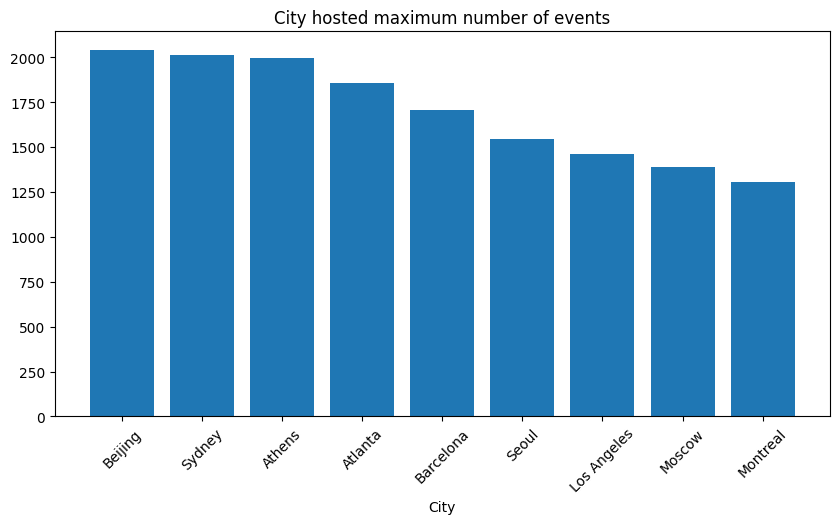

In [ ]:
plt.figure(figsize=(10,5))
plt.bar(City.index, City.values)
plt.xticks(rotation=45)
plt.title("City hosted maximum number of events")
plt.xlabel("City")
plt.show()

In [ ]:
# Understand the events themselves.
q3_data = df[['Sport', 'Discipline', 'Event']].drop_duplicates()
print("Total number of unique events are held so far are :",len(q3_data))
q3_data


Total number of unique events are held so far are : 334


,Sport,Discipline,Event
0,Aquatics,Diving,3m springboard
4,Aquatics,Diving,10m platform
12,Aquatics,Swimming,4x100m freestyle relay
13,Aquatics,Swimming,400m freestyle
15,Aquatics,Swimming,1500m freestyle
...,...,...,...
15016,Sailing,Sailing,Laser Radial - One Person Dinghy
15020,Sailing,Sailing,Finn - Heavyweight Dinghy
15026,Sailing,Sailing,Laser - One Person Dinghy
15029,Sailing,Sailing,RS:X - Windsurfer


<Axes: xlabel='Sport'>

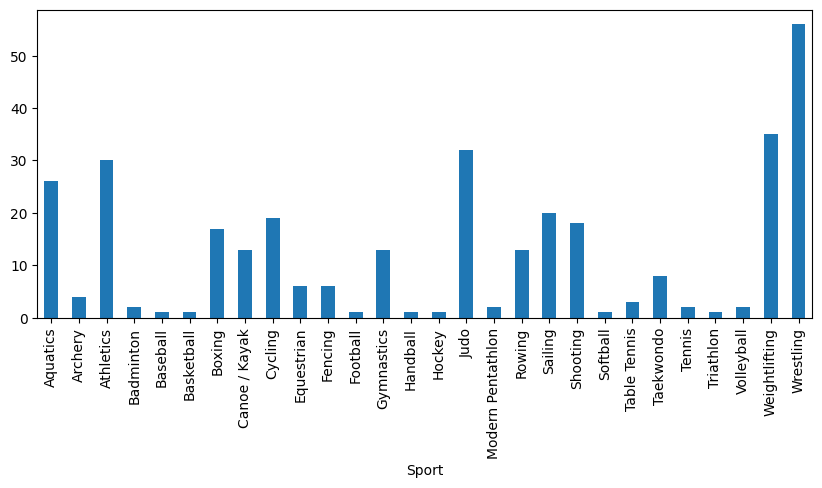

In [ ]:
q3_data = q3_data.groupby(['Sport'])['Sport'].size()
plt.figure(figsize = (10,4))
q3_data.plot.bar(x = 'Sport', y = 'Count')

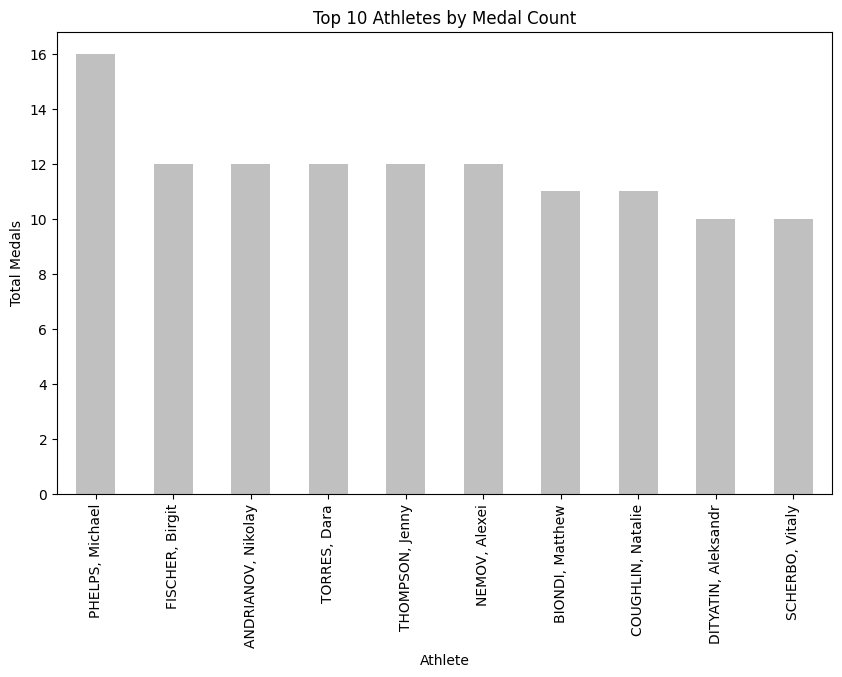

In [ ]:
# Which Athlete has win most medal from given period?
athlete_medal_count = df.groupby('Athlete')['Medal'].count().sort_values(ascending=False)

# Plotting the top 10 athletes with most medals
plt.figure(figsize=(10, 6))
athlete_medal_count.head(10).plot(kind='bar', color='silver')
plt.title("Top 10 Athletes by Medal Count")
plt.xlabel("Athlete")
plt.ylabel("Total Medals")
plt.show()

<Axes: ylabel='Gender'>

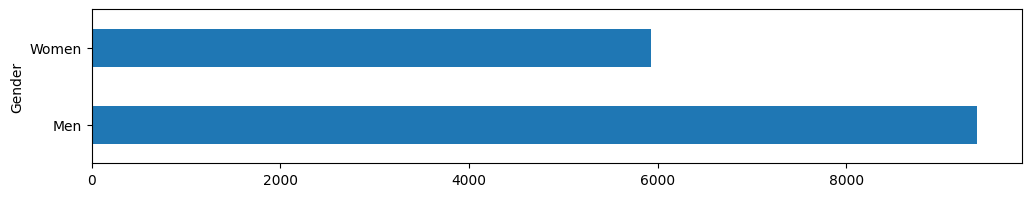

In [ ]:
# Gender ratio in winning teams?
q4_data = df.groupby(['Gender'])['Gender'].count()
plt.figure(figsize = (12,2))
q4_data.plot.barh(x = 'Athlete', y = 'Count')

In [ ]:
q4_data = df[['Event', 'Gender']]
q4_data = q4_data.groupby(['Event', 'Gender'])['Gender'].count()
print(q4_data.head(20))

Event                               Gender
+ 100kg (heavyweight)               Men       16
+ 100kg (super heavyweight)         Men       18
+ 105kg                             Men        9
+ 108kg, total (super heavyweight)  Men        3
+ 110kg, total (super heavyweight)  Men       15
+ 67 kg                             Women     10
+ 72kg (heavyweight)                Women      8
+ 75kg                              Women      9
+ 78kg (heavyweight)                Women     12
+ 80 kg                             Men       10
+ 81kg (heavyweight)                Men        8
+ 91kg (super heavyweight)          Men       28
+ 93kg (heavyweight)                Men        4
+ 95kg (heavyweight)                Men       16
- 48 kg                             Women      8
- 48kg                              Women      7
- 48kg (extra-lightweight)          Women     12
- 48kg (light-flyweight)            Men       64
- 49 kg                             Women     10
- 52kg, total (flyweight) 

In [ ]:
# Which country has win most medal and how many in each year?


In [ ]:
# Can you tell me which country has dominated any particular sport?
q6_data = df.groupby(['Sport', 'Country'])['Country'].count().reset_index(name = 'Count').sort_values(ascending = [True, False],by = ['Sport','Count'])
q6_data.Sport.unique()


array(['Aquatics', 'Archery', 'Athletics', 'Badminton', 'Baseball',
       'Basketball', 'Boxing', 'Canoe / Kayak', 'Cycling', 'Equestrian',
       'Fencing', 'Football', 'Gymnastics', 'Handball', 'Hockey', 'Judo',
       'Modern Pentathlon', 'Rowing', 'Sailing', 'Shooting', 'Softball',
       'Table Tennis', 'Taekwondo', 'Tennis', 'Triathlon', 'Volleyball',
       'Weightlifting', 'Wrestling'], dtype=object)

In [ ]:
inp = 'Aquatics'
try:
  inp = input("Select a Sport from above list")
except:
  print("Input is interrupted")
temp = q6_data[q6_data['Sport'] == inp].head(3)
print(temp)


Select a Sport from above listSailing
       Sport         Country  Count
579  Sailing   United States     64
578  Sailing  United Kingdom     40
548  Sailing          Brazil     28


In [ ]:
# Has any athlete changed his or her Event or Discipline or sport and still win the medal?
temp = df[['Athlete','Sport']].drop_duplicates()
temp = temp.groupby(['Athlete'])
for k,v in temp:
  if len(v['Sport'].tolist()) >1:
    print(k,v['Sport'].tolist())


('BELOVA, Irina',) ['Athletics', 'Gymnastics']
('CHEN, Jing',) ['Table Tennis', 'Volleyball']
('DIMITROV, Stefan',) ['Volleyball', 'Weightlifting']
('GAVRILOV, Yuri',) ['Football', 'Handball']
('GONZALEZ, Raul',) ['Athletics', 'Handball']
('KOLESNIKOV, Nikolai',) ['Athletics', 'Weightlifting']
('KOVACS, Istvan',) ['Wrestling', 'Boxing']
('KOVALENKO, Alexandre',) ['Athletics', 'Aquatics']
('KUZNETSOV, Mikhail',) ['Rowing', 'Canoe / Kayak']
('KUZNETSOV, Nikolai',) ['Rowing', 'Cycling']
('LEE, Eun Kyung',) ['Archery', 'Hockey']
('LI, Na',) ['Aquatics', 'Fencing']
('LI, Ting',) ['Aquatics', 'Tennis']
('OVCHINNIKOVA, Elena',) ['Volleyball', 'Aquatics']
('ROMERO, Rebecca',) ['Rowing', 'Cycling']
('THOMPSON, Richard',) ['Baseball', 'Athletics']
('TOMA, Sanda',) ['Rowing', 'Canoe / Kayak']
('WANG, Liping',) ['Football', 'Athletics']
('WELLS, Matthew',) ['Hockey', 'Rowing']
('YANG, Wei',) ['Badminton', 'Gymnastics']
('YOUNG, Tim',) ['Rowing', 'Baseball']
